# Análise Exploratória de Dados (2)

## Exploração de relacionamento

Do ponto de vista conceitual:

* Variável de Resposta vs Variáveis ​​Explicativas
* Variáveis ​​Explicativas vs Outras Variáveis ​​Explicativas
* Variável de resposta versus outras variáveis ​​de resposta

Do ponto de vista prático:

* Variável Qualitativa vs Variável Qualitativa
* Variável Contínua vs Variável Qualitativa
* Variável Contínua vs Variável Contínua

Definir SparkContext e SQLContext

In [32]:
#from pyspark import SparkContext
#sc = SparkContext()
#from pyspark.sql import SQLContext
#sqlContext=SQLContext(sc)
#import pandas as pd

Lendo o arquivo de trabalho

In [79]:
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("/user/cloudera/spark/voos/bd5.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

## V. Continua vs V. Cualitativa

Tabelas de resumo numérico

In [80]:
g3 = sqlContext.sql("select DEST, count(*) as n, \
               avg(ARR_DELAY) as Mean, \
               stddev(ARR_DELAY) as Std \
               from bd5 group by DEST")
g3.show()

+----+----+------------------+------------------+
|DEST|   n|              Mean|               Std|
+----+----+------------------+------------------+
| ORD|3734| 7.260846277450455| 63.06742516325428|
| LAS|3675|14.813877551020408|  46.3175023214435|
| LAX|5253| 22.35275080906149| 56.97652432880392|
| ATL|3081|3.1830574488802337|44.706091988773885|
| DEN|3889|12.572897917202365|50.468508657490894|
| PHX|3243|11.315757015109467|43.220567769891666|
| DFW|3248| 6.710591133004926|63.411867733155056|
| SFO|4343| 20.50448998388211| 50.34815147630458|
+----+----+------------------+------------------+



Resumo gráfico

In [81]:
pdf3=g3.toPandas()
pdf3

,DEST,n,Mean,Std
0,ORD,3734,7.260846,63.067425
1,LAS,3675,14.813878,46.317502
2,LAX,5253,22.352751,56.976524
3,ATL,3081,3.183057,44.706092
4,DEN,3889,12.572898,50.468509
5,PHX,3243,11.315757,43.220568
6,DFW,3248,6.710591,63.411868
7,SFO,4343,20.504490,50.348151


Representação gráfica das informações adicionadas

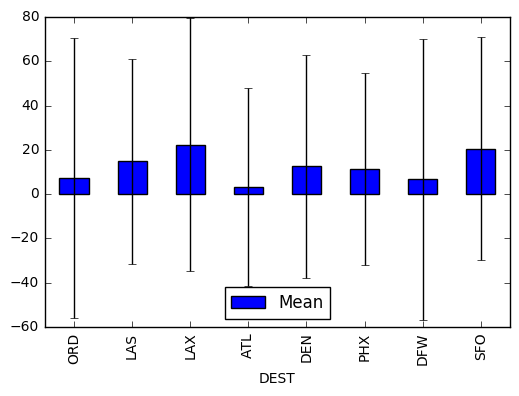

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

pdf3.plot(kind='bar',x='DEST',y='Mean',yerr='Std')

In [83]:
pdf4 = bd5.sample(False, 0.1, 0).select('DEST','Horario','ARR_DELAY','DEP_DELAY','RETARD').toPandas()
pdf4[1:10]

,DEST,Horario,ARR_DELAY,DEP_DELAY,RETARD
1,LAX,4,-20.0,9.0,-29.0
2,LAX,4,30.0,40.0,-10.0
3,LAX,4,-11.0,-5.0,-6.0
4,LAX,4,-4.0,10.0,-14.0
5,LAX,4,7.0,2.0,5.0
6,LAS,2,2.0,-1.0,3.0
7,LAS,2,1.0,4.0,-3.0
8,LAX,4,1.0,22.0,-21.0
9,LAX,4,74.0,90.0,-16.0


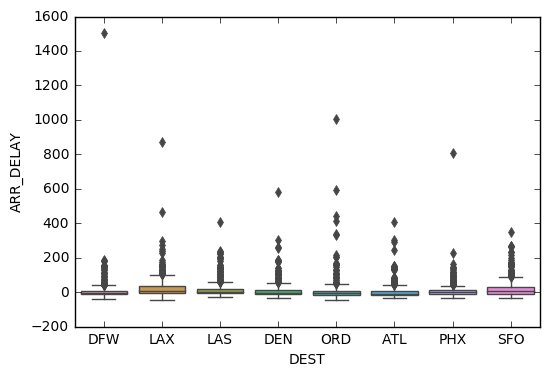

In [84]:
import seaborn as sns
sns.boxplot(x='DEST',y='ARR_DELAY',data=pdf4)

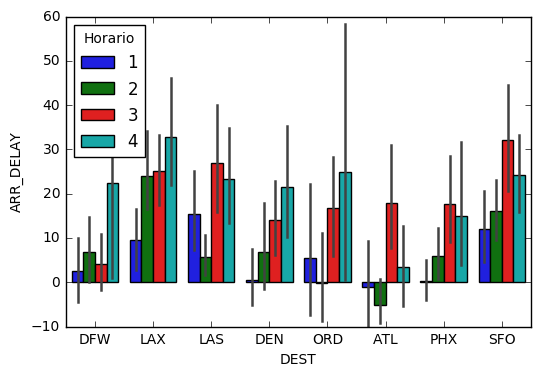

In [85]:
sns.barplot(x="DEST", y="ARR_DELAY", hue="Horario", data=pdf4)

## V. Qualitativa vs. V. Qualitativa

Resumo Numérico

In [88]:
pdf6 = sqlContext.sql("select DEST, DELAY, count(*) as n \
               from bd5 group by DEST, DELAY \
               order by DEST, DELAY").toPandas()
pdf6

,DEST,DELAY,n
0,ATL,0,2527
1,ATL,1,554
2,DEN,0,2885
3,DEN,1,1004
4,DFW,0,2647
5,DFW,1,601
6,LAS,0,2620
7,LAS,1,1055
8,LAX,0,3229
9,LAX,1,2024


Resumo Gráfico

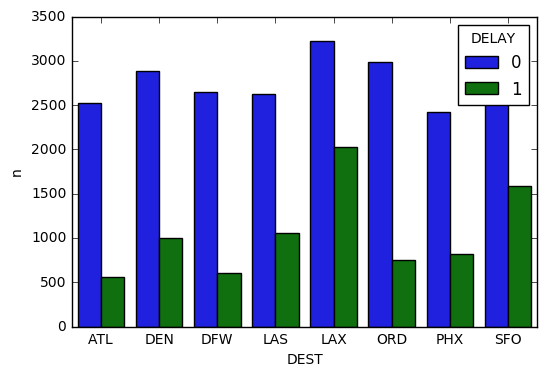

In [89]:
sns.barplot(x="DEST", y="n", hue="DELAY", data=pdf6)

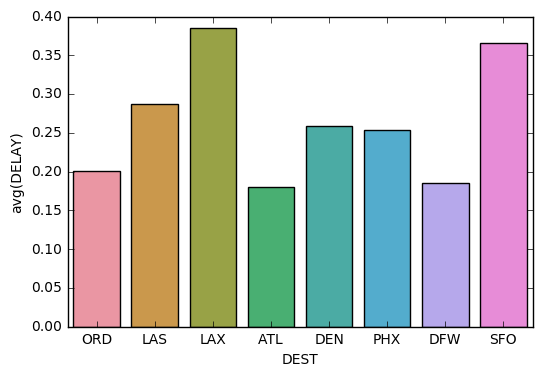

In [90]:
pdf7 = bd5.groupBy('DEST').mean('DELAY').toPandas()
sns.barplot(x="DEST", y="avg(DELAY)", data=pdf7)

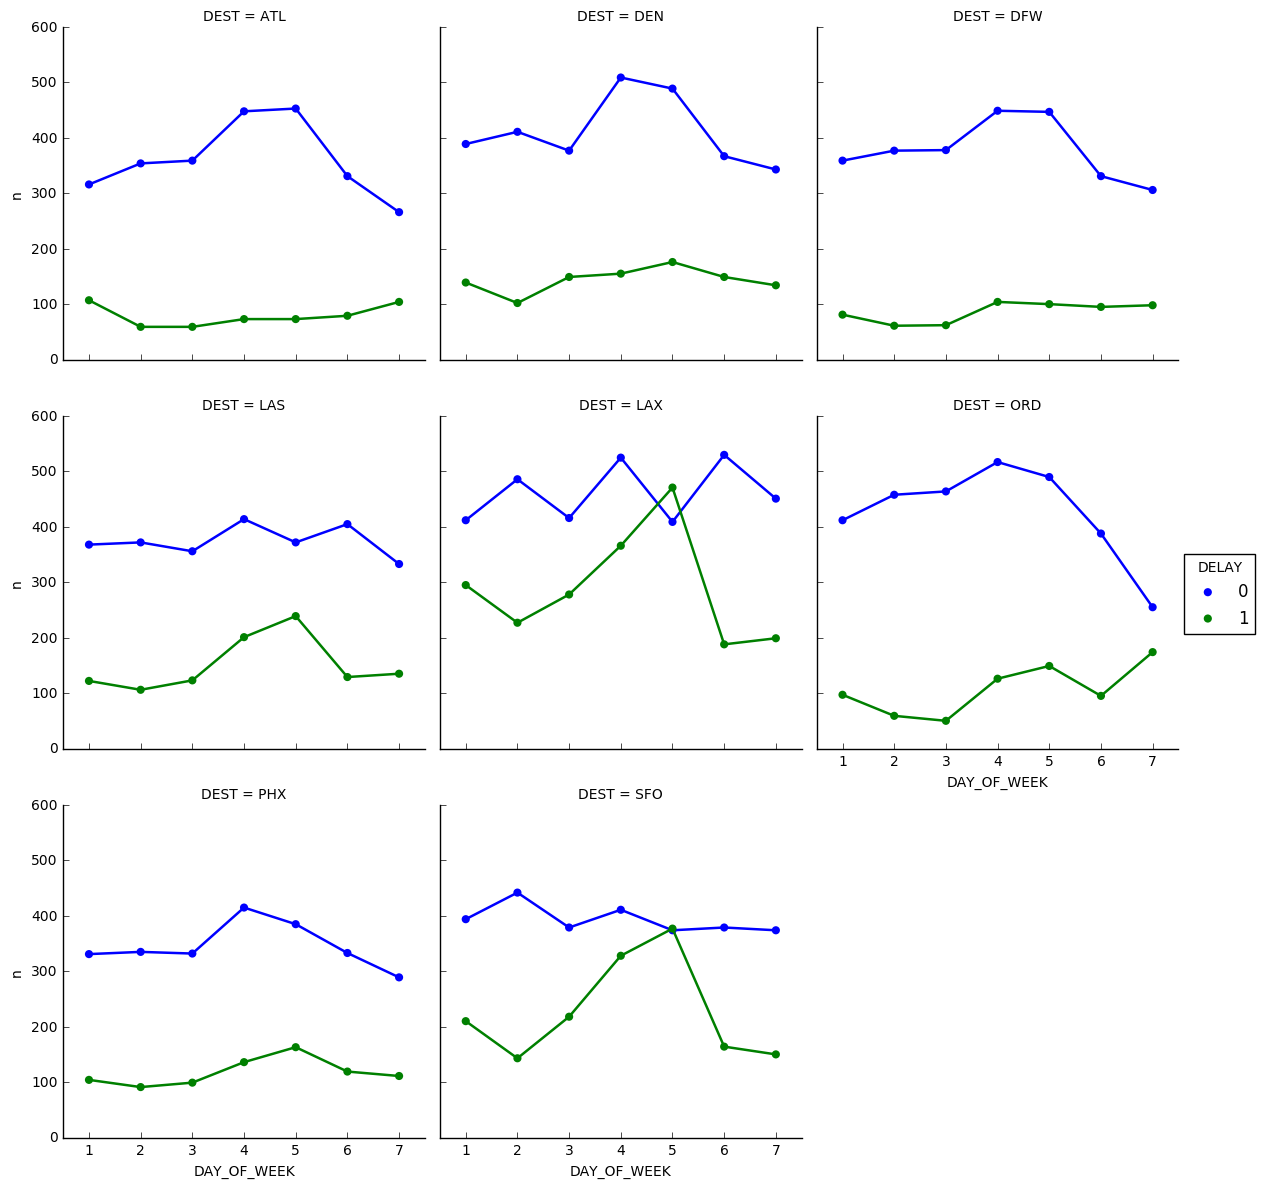

In [91]:
pdf8 = sqlContext.sql("select DAY_OF_WEEK, DEST, DELAY, count(*) as n \
               from bd5 group by DAY_OF_WEEK, Dest, DELAY \
               order by DAY_OF_WEEK, DEST, DELAY").toPandas()

sns.factorplot(x="DAY_OF_WEEK", y="n", col="DEST", hue="DELAY", data=pdf8, col_wrap=3,)

## V. Continua vs V. Continua

Resumo numérico

In [92]:
bd5.corr('ARR_DELAY','DEP_DELAY')

0.9571345646224731

In [94]:
bd5.corr('RETARD','DEP_DELAY')

0.08921162142633973

Correlações resumidas de uma amostra

In [95]:
pdf4.corr()

,Horario,ARR_DELAY,DEP_DELAY,RETARD
Horario,1.000000,0.115192,0.109886,0.048151
ARR_DELAY,0.115192,1.000000,0.971644,0.347826
DEP_DELAY,0.109886,0.971644,1.000000,0.116279
RETARD,0.048151,0.347826,0.116279,1.000000


Resumo Gráfico

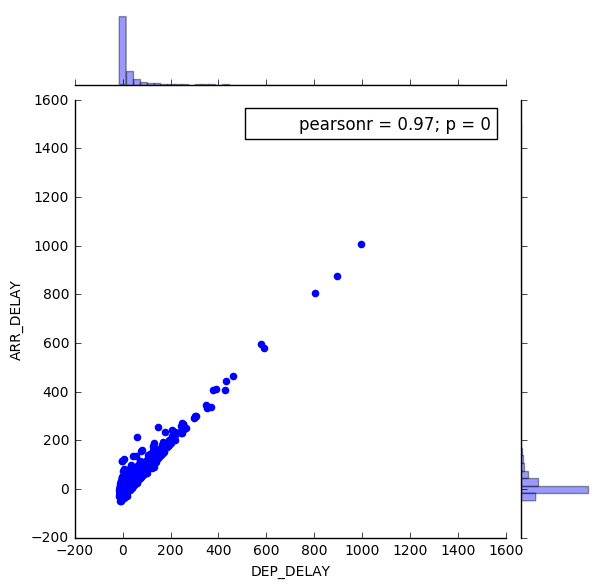

In [96]:
sns.jointplot(x="DEP_DELAY", y="ARR_DELAY", data=pdf4)

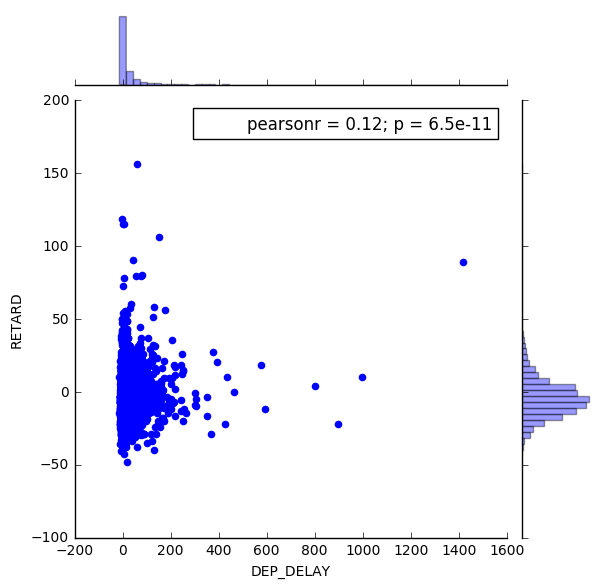

In [97]:
sns.jointplot(x="DEP_DELAY", y="RETARD", data=pdf4)